# Importing the corpus


In [1]:
import pickle
from collections import Counter
from googletrans import Translator  # Import Translator module from googletrans package
import _dynet as dy

# train_data = pickle.load(open("train_data.pkl", "rb"))
# test_data = pickle.load(open("test_data.pkl", "rb"))
# val_data = pickle.load(open("val_data.pkl", "rb"))

In [2]:
def createCorpus():
    corpus_it_italian=[]
    corpus_en_italian=[]
    puncList = [".",";",":","!","?","/","\\",",","#","@","$","&",")","(","\"","..."]
    i=0
    with open ("train_it_italian.it", "r",encoding="utf8") as myfile:
        for line in myfile:
            sentence=[]
            for word in line.split(" "):
                word=word.replace("\n","")
                if(word not in puncList):
                    if word.replace('.','',1).isdigit():
                        word="DIG"
                    sentence.append(word) 
            corpus_it_italian.append(sentence)



    with open ("train_en_italian.en", "r",encoding="utf8") as myfile:
        for line in myfile:
            sentence=[]
            for word in line.split(" "):
                word=word.replace("\n","")
                if(word not in puncList):
                    if word.replace('.','',1).isdigit():
                        word="DIG"
                    sentence.append(word) 
            corpus_en_italian.append(sentence)

    with open('corpus_en_italian.pkl', 'wb') as f:
        pickle.dump(corpus_en_italian, f)
    with open('corpus_it_italian.pkl', 'wb') as f:
        pickle.dump(corpus_it_italian, f)
    
    return corpus_en_italian, corpus_it_italian

In [3]:
# corpus_en_italian, corpus_it_italian = createCorpus()
corpus_en_italian = pickle.load(open("corpus_en_italian.pkl", "rb"))
corpus_it_italian = pickle.load(open("corpus_it_italian.pkl", "rb"))

In [4]:
len(corpus_en_italian) == len(corpus_it_italian)

True

# Building the dictionary for word2Vec

In [5]:
from gensim.models import word2vec

In [6]:
def createW2V():
    model_en_italian=word2vec.Word2Vec(corpus_en_italian,min_count=1)
    model_it_italian=word2vec.Word2Vec(corpus_it_italian,min_count=1)

    with open('model_en_italian.pkl', 'wb') as f:
        pickle.dump(model_en_italian, f)
    with open('model_it_italian.pkl', 'wb') as f:
        pickle.dump(model_it_italian, f)
    
    return model_en_italian, model_it_italian

In [7]:
# model_en_italian, model_it_italian = createW2V()
model_en_italian = pickle.load(open("model_en_italian.pkl", "rb"))
model_it_italian = pickle.load(open("model_it_italian.pkl", "rb"))

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [9]:
X_it = model_it_italian[model_it_italian.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [10]:
X_en = model_en_italian[model_en_italian.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# PCA and Visualization

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result_it_pca = pca.fit_transform(X_it)

In [12]:
pca = PCA(n_components=2)
result_en_pca = pca.fit_transform(X_en)

uno
due
tre
quattro
cinque
sei
sette


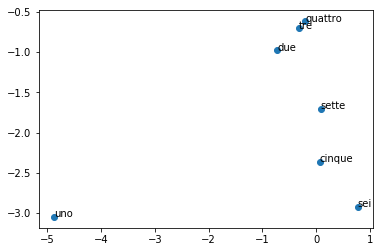

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#FRENCH
# create a scatter plot of the projection
index_it=[list(model_it_italian.wv.vocab).index("uno"),list(model_it_italian.wv.vocab).index("due"),list(model_it_italian.wv.vocab).index("tre"),list(model_it_italian.wv.vocab).index("quattro"),list(model_it_italian.wv.vocab).index("cinque"),list(model_it_italian.wv.vocab).index("sei"),list(model_it_italian.wv.vocab).index("sette")]
result_it=np.array([result_it_pca[i] for i in index_it])
plt.scatter(-result_it[:, 0],-result_it[:, 1])
it_words = [ list(model_it_italian.wv.vocab)[i] for i in index_it]
for i, word in enumerate(it_words):
    print(word)
    plt.annotate(word, xy=(-result_it[i, 0], -result_it[i, 1]))
plt.show()

one
two
three
four
five
six
seven


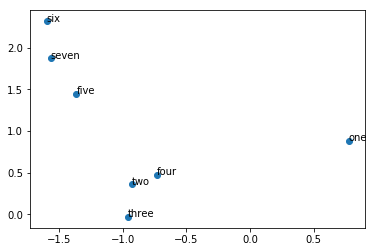

In [14]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en_italian.wv.vocab).index("one"),list(model_en_italian.wv.vocab).index("two"),list(model_en_italian.wv.vocab).index("three"),list(model_en_italian.wv.vocab).index("four"),list(model_en_italian.wv.vocab).index("five"),list(model_en_italian.wv.vocab).index("six"),list(model_en_italian.wv.vocab).index("seven")]
result_en=np.array([result_en_pca[i] for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en_italian.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
plt.show()

# Reducing Objective Function

In [15]:
all_word = []
english_vocab = set()
for sentence in corpus_en_italian:
    for word in sentence:
        all_word.append(word)
        english_vocab.add(word)
        
italian_vocab = set()
for sentence in corpus_it_italian:
    for word in sentence:
        italian_vocab.add(word)
        
counts = Counter(all_word)
common_vocab = set()
train_vocab = set()
for word in counts.most_common(70000):
    common_vocab.add(word[0])
for word in counts.most_common(10000):
    train_vocab.add(word[0])

# Create Pairs of English-French Tuples

In [16]:
def generateWordPairs():
#     word_pairs_it = []
#     word_pairs_smaller_it = []
    
    word_pairs_it = pickle.load(open("word_pairs_it.pkl", "rb"))
    word_pairs_smaller_it = pickle.load(open("word_pairs_smaller_it.pkl", "rb"))

    count = 0
    for word in english_vocab:
        if count == 1000:
            break
        print(count)
        count += 1
        translator = Translator()
        italian_word = translator.translate(word,src="en",dest="it").text
        if italian_word in italian_vocab:
            word_pairs_it.append((word, italian_word))
            if italian_word != word:
                word_pairs_smaller_it.append((word, italian_word))

    with open('word_pairs_it.pkl', 'wb') as f:
        pickle.dump(word_pairs_it, f)
    with open('word_pairs_smaller_it.pkl', 'wb') as f:
        pickle.dump(word_pairs_smaller_it, f)
    
    return word_pairs_it, word_pairs_smaller_it

In [17]:
# word_pairs_it, word_pairs_smaller_it = generateWordPairs()
word_pairs_it = pickle.load(open("word_pairs_it.pkl", "rb"))
word_pairs_smaller_it = pickle.load(open("word_pairs_smaller_it.pkl", "rb"))

# Least Square Method of Solving Transormation Matrix on 2D data

In [18]:
def generateMat(size, dimm):
    en_list = list(model_en_italian.wv.vocab)
    it_list = list(model_it_italian.wv.vocab)

    A = np.zeros((dimm*size, dimm*dimm))
    b = np.zeros((dimm*size, 1))

    count = 0
    inds = np.random.choice(len(word_pairs_it),size=size,replace=False)
    for i in range(len(inds)):
        word_pair = word_pairs_it[inds[i]]
        word_en = word_pair[0]
        word_it = word_pair[1]
#         en_emb = X_en[en_list.index(word_en)]
#         fr_emb = X_fr[fr_list.index(word_fr)]
        en_emb = result_en_pca[en_list.index(word_en)]
        it_emb = result_it_pca[it_list.index(word_it)]
        
        for j in range(dimm):
            A[i*dimm+j,j*dimm:(j+1)*dimm] = en_emb
            b[i*dimm+j] = it_emb[j]
        
        if count % 100 == 0:
            print(count)
        count += 1

    A_trans = np.transpose(A)
    coef = np.dot(np.dot(np.linalg.inv(np.dot(A_trans, A)), A_trans), b)

    transform_mat = coef.reshape((dimm,dimm))
    

    return transform_mat

In [19]:
mat = generateMat(600,2)

0
100
200
300
400
500


In [20]:
def transform(emb):
    out_emb = np.dot(mat, emb.reshape((len(emb),1)))
    return out_emb.flatten()

one
two
three
four
five
six
seven
uno
due
tre
quattro
cinque
sei
sette


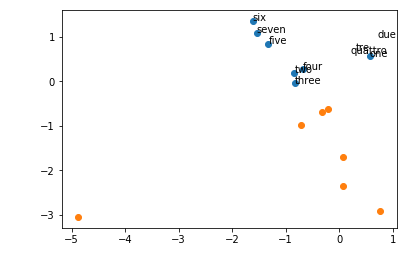

In [21]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en_italian.wv.vocab).index("one"),list(model_en_italian.wv.vocab).index("two"),list(model_en_italian.wv.vocab).index("three"),list(model_en_italian.wv.vocab).index("four"),list(model_en_italian.wv.vocab).index("five"),list(model_en_italian.wv.vocab).index("six"),list(model_en_italian.wv.vocab).index("seven")]
result_en=np.array([transform(result_en_pca[i]) for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en_italian.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
# plt.show()

index_it=[list(model_it_italian.wv.vocab).index("uno"),list(model_it_italian.wv.vocab).index("due"),list(model_it_italian.wv.vocab).index("tre"),list(model_it_italian.wv.vocab).index("quattro"),list(model_it_italian.wv.vocab).index("cinque"),list(model_it_italian.wv.vocab).index("sei"),list(model_it_italian.wv.vocab).index("sette")]
result_it=np.array([result_it_pca[i] for i in index_it])
plt.scatter(-result_it[:, 0],-result_it[:, 1])
it_words = [ list(model_it_italian.wv.vocab)[i] for i in index_it]
for i, word in enumerate(it_words):
    print(word)
    plt.annotate(word, xy=(result_it[i, 0], result_it[i, 1]))
plt.show()

In [22]:
word_arr = np.array(list(model_it_italian.wv.vocab))
en_list = list(model_en_italian.wv.vocab)
def predict_2d(word_en,topWords):
    en_emb = result_en_pca[en_list.index(word_en)]
    translator = Translator()
    italian_word = translator.translate(word_en,src="en",dest="it").text
    return list(word_arr[np.argsort(np.sum((result_it_pca - transform(en_emb)) ** 2,axis=1))[:topWords]]), italian_word

In [23]:
predict_2d('hi',5)

(["'Quale", 'Proteste', 'settari,', 'dell&#x02BC;azienda', 'conteggio.'],
 'Ciao')

# Improved Method  -----This is the method for generating transformation matrix, make sure to run all code above this

In [27]:
DIMM = X_en.shape[1]
HIDDEN = 1000

In [28]:
def generateTransormMatImproved():
    
    training_tuples = pickle.load(open("training_tuples.pkl", "rb"))

    dyparams = dy.DynetParams()
    dyparams.set_mem(2048)
    dyparams.set_autobatch(True)
    dyparams.init()

    # create a parameter collection and add the parameters.
    m = dy.ParameterCollection()
#     pW = m.add_parameters((HIDDEN,DIMM))
    pW = m.add_parameters((DIMM,DIMM))
    pb = m.add_parameters((HIDDEN))
    pC = m.add_parameters((DIMM,HIDDEN))

    dy.renew_cg() # new computation graph. not strictly needed here, but good practice.

    # associate the parameters with cg Expressions
    W = dy.parameter(pW)
    b = dy.parameter(pb)
    C = dy.parameter(pC)

    x = dy.vecInput(DIMM) # an input vector of size 2. Also an expression.
    y = dy.vecInput(DIMM)
#     output = C*(W*x + b)
    output = W*x
    
    SIZE = 10000

    trainer = dy.SimpleSGDTrainer(m)

    en_list = list(model_en_italian.wv.vocab)
    it_list = list(model_it_italian.wv.vocab)


    EPOCHS = 1

    words = np.random.choice(list(common_vocab),size=SIZE,replace=False)
    for epoch in range(EPOCHS):
        total_loss = 0
        seen_instances = 0
        for i,tup in enumerate(training_tuples):
            word_en = tup[0]
            word_it = tup[1]
#             translator = Translator()
#             word_it = translator.translate(word_en,src="en",dest="it").text
            if word_it not in italian_vocab:
                continue
                
#             training_tuples.add((word_en,word_it))
            
            en_emb = X_en[en_list.index(word_en)]
            it_emb = X_it[it_list.index(word_it)]

            en_emb /= np.linalg.norm(en_emb)
            it_emb /= np.linalg.norm(it_emb)

            x.set(en_emb)
            y.set(it_emb)
        
#             loss = 1 - dy.dot_product(output,y) / (dy.l2_norm(output) * dy.l2_norm(y)).value()
            
            loss = dy.squared_distance(output,y)
        
            seen_instances += 1
            total_loss += loss.value()
            
            
            loss.backward()
            trainer.update()
            
#             tmp = W.value()
#             u, s, vh = np.linalg.svd(tmp, full_matrices=True)
#             newW = np.dot(u,vh)
            
#             pW = m.add_parameters((DIMM,DIMM),init=dy.NumpyInitializer(newW))
#             W = dy.parameter(pW)

            
            if i % 1 == 0:
                print(total_loss / seen_instances)
                print(i)

    mat = W.value()
    matC = C.value()
    matB = b.value()
    
#     with open('training_tuples.pkl', 'wb') as f:
#         pickle.dump(training_tuples, f)
    
    return mat, matC, matB

In [29]:
mat, C, b = generateTransormMatImproved()

410.0675354003906
0
272.96163177490234
1
209.30836232503256
2
180.72296142578125
3
155.58279190063476
4
165.09641329447427
5
141.90317974771773
6
124.56795209646225
7
110.88274414009518
8
101.07613981962204
9
92.57359260862523
10
84.91004709899426
11
99.27749887338051
12
106.25010044659886
13
148.2017945965131
14
139.17659443989396
15
137.38019803341697
16
129.80948879652553
17
124.31177236845619
18
132.99122464358805
19
132.88451055969512
20
126.97735252976418
21
163.16335864429888
22
157.02236783256134
23
153.25359454870224
24
153.44851702680955
25
167.5598101064011
26
161.73995177873545
27
156.18641403831285
28
151.02508092125257
29
146.2208060929852
30
141.6727812383324
31
137.41583507891858
32
136.1126345623942
33
152.0845664041383
34
147.90228210058478
35
144.5708202880782
36
140.81894871592522
37
137.2954589113211
38
133.86770205572248
39
131.17137881095817
40
128.15740089260396
41
125.29153259479722
42
122.49580509621988
43
119.78348105814722
44
117.39081112262996
45
115.151560

405
72.93524961930491
406
72.75697102740078
407
72.58678447244766
408
72.41241024942478
409
72.23723659650797
410
72.43257633501717
411
72.25904241398193
412
73.14829896583902
413
73.26046597784362
414
73.08789314586633
415
72.91744311163716
416
72.74361212137177
417
72.57540917473897
418
72.45269467283396
419
72.49988464185539
420
72.4863006516991
421
72.36443671794612
422
72.83435193792793
423
72.98126549460432
424
72.87378233943151
425
72.70554566012578
426
72.53732064121759
427
72.36971176815999
428
72.38295615113579
429
73.15138963873557
430
73.32667351326974
431
73.15917552294377
432
72.99221838666513
433
72.8284563370734
434
73.10615713873007
435
72.94071034891893
436
74.12553252224474
437
73.95806296559259
438
73.79475533223118
439
73.63431728635481
440
73.47124666669217
441
73.30629938214378
442
73.61286180116538
443
73.46053309848301
444
73.29978982889565
445
73.21104367819909
446
73.05146398667213
447
72.88961937020477
448
72.76206094277401
449
72.61347208807283
450
72.45584

68.366306115119
798
68.28648223635275
799
68.20282433866134
800
68.95653172410059
801
68.87101902088538
802
68.79182710825229
803
69.33916906166984
804
69.2535412929832
805
69.19303910322071
806
69.10825628581189
807
69.03191238760083
808
68.97388762729128
809
68.919724813744
810
68.83631060929886
811
68.76638594479157
812
68.68297800978678
813
69.00211287488692
814
68.92351636415184
815
68.85265648766732
816
69.1590168267024
817
69.13864905268446
818
69.06795546667333
819
68.98445465213797
820
69.0816431660477
821
69.31931056837718
822
69.23602826886548
823
69.24237566897816
824
69.16638243841075
825
69.08337835014821
826
69.00127584404865
827
69.05987425794234
828
68.97933302155909
829
68.97866915279795
830
68.89606688494453
831
68.81839581991748
832
68.92373125880903
833
68.85135852941228
834
68.78944361531154
835
68.70899252545894
836
68.62794885751046
837
68.55754587882342
838
69.41773069678761
839
69.33617560617297
840
69.74069698463302
841
69.65863712296809
842
69.57639300657692

65.46871747211371
1173
65.42307227784332
1174
65.37110330478991
1175
65.43638191308538
1176
65.3818492668828
1177
65.32693111244669
1178
65.30076074060052
1179
65.2567240356623
1180
65.22262202609525
1181
65.16997092378122
1182
65.11693002047282
1183
65.06894343297002
1184
65.01710744476351
1185
64.98661743686004
1186
64.93217948854584
1187
64.881887022268
1188
64.82862822291042
1189
65.02365744266875
1190
64.97051851934248
1191
64.91770414777307
1192
64.89528395585292
1193
64.86032289763187
1194
64.82824257906078
1195
64.77573895686265
1196
64.73434426283809
1197
64.6813502335848
1198
64.62766872654669
1199
64.5773688165702
1200
64.83994979678208
1201
64.78805342923884
1202
64.76377272754722
1203
64.75097235594856
1204
64.725740072841
1205
64.67339297247914
1206
64.62032795184606
1207
64.5672439710261
1208
64.51700847127036
1209
64.46429022197003
1210
64.4117668189213
1211
64.36154797354135
1212
64.31850242799169
1213
64.26691337473414
1214
64.2142314834943
1215
64.27861897345255
1216

1537
61.851396116371795
1538
61.81151357706056
1539
61.772287576508305
1540
61.73308888292991
1541
61.694006159821946
1542
61.658256965160966
1543
61.70175683431592
1544
61.66211934558045
1545
61.62388666940982
1546
61.58859297905348
1547
61.56326377556074
1548
61.52476062361992
1549
61.58240128749757
1550
61.54580861624551
1551
61.6633760226244
1552
61.685666339457555
1553
61.65109643524818
1554
61.6116563613888
1555
61.573421478929454
1556
61.535477804326106
1557
61.62672789717682
1558
61.58781566234688
1559
61.54943354618494
1560
61.657949280234654
1561
61.63178231807632
1562
61.594171408542415
1563
61.5571079804565
1564
61.518024530264135
1565
61.48898853838739
1566
61.44992963586487
1567
61.42095536693285
1568
61.38356639424659
1569
61.34960424616212
1570
61.42797456454941
1571
61.445567853845894
1572
61.40851212408171
1573
61.37032102612039
1574
61.332997971197805
1575
61.4390573499768
1576
61.401222574287324
1577
61.36257251746778
1578
61.3607256916387
1579
61.322114261028645
15

61.775827904962064
1907
61.74538264571333
1908
61.716250419661556
1909
61.68422614107194
1910
61.66389067871418
1911
61.63201257318328
1912
61.60020991183366
1913
61.5815187439731
1914
61.54963006996715
1915
61.51815724602755
1916
61.63273760965201
1917
61.85402556935276
1918
61.842727298970566
1919
61.81127232775278
1920
61.783954373257515
1921
61.75333319984675
1922
61.917928945000156
1923
61.885870624809684
1924
61.939476965788295
1925
61.90803213685666
1926
61.8875446331154
1927
61.85621332657027
1928
61.830327881600496
1929
61.81773226195199
1930
61.89287509352516
1931
61.866614854016255
1932
61.83485396599133
1933
61.95508630814594
1934
61.93359639800215
1935
62.32953233751298
1936
62.30262740677409
1937
62.364504590144456
1938
62.78764405474643
1939
62.7906576613351
1940
62.78658789564902
1941
62.75643620761404
1942
62.72548835037598
1943
62.69596766925831
1944
62.664667734841814
1945
62.632781677416844
1946


KeyboardInterrupt: 

# Better Prediction Method -- this is the prediction method using transformation matrix

In [30]:
word_arr = np.array(list(model_it_italian.wv.vocab))
X_it_mag = np.sum(X_it**2,axis=1)**0.5
def predict_cosineSim(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
#     out = (np.dot(C,(np.dot(mat,en_emb.reshape((DIMM,1))) + np.array(b).reshape((HIDDEN,1))))).flatten()
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
#     translator = Translator()
#     french_word = translator.translate(word_en,src="en",dest="fr").text
    
    out_mag = np.sum(out**2)**0.5
    cos_sim = np.sum((X_it * out),axis=1)/(X_it_mag*out_mag)
    return list(word_arr[np.argsort(cos_sim)[::-1][:topWords]])#, french_word

In [31]:
predict_cosineSim('pencil',5)

ValueError: shapes (2,2) and (100,1) not aligned: 2 (dim 1) != 100 (dim 0)

In [32]:
mat

array([[ 0.85983969, -0.10368493],
       [ 0.02855834,  0.60861331]])

# Worse Prediction Method -- ignore this

In [ ]:
word_arr = np.array(list(model_it_italian.wv.vocab))
def predict_closest(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
#     translator = Translator()
#     french_word = translator.translate(word_en,src="en",dest="fr").text
    
    return list(word_arr[np.argsort(np.sum((X_it - out) ** 2,axis=1))[:topWords]])#, french_word

In [ ]:
predict_closest('fast',5)

# Accuracy of Model -- running this gets the accuracy -- not implemented correctly yet

In [ ]:
test_sample = np.random.choice(list(train_vocab),size=3000,replace=False)

num_correct = 0
num_incorrect = 0

# test_tuple = pickle.load(open("test_tuple.pkl", "rb"))

for i, tup in enumerate(val_data):
    print(i)
    if i == 300:
        break
    
    word = tup[0]
    french_word = tup[1]
    
#     translator = Translator()
#     french_word = translator.translate(word,src="en",dest="fr").text
#     if french_word not in french_vocab or word == french_word or word[0].isupper():
#         continue
    output_list = predict_cosineSim(word,20)
    output_set = set(output_list)
    
#     test_tuple.add((word,french_word))
#     print(i)
    
    if french_word in output_set:
        num_correct += 1
        print('CORRECT:  ' + word)
    else:
#         flag = False
#         for word_fr in output_list:
#             if translator.translate(word_fr,src="fr",dest="en").text == word:
#                 num_correct += 1
#                 print('CORRECT:  ' + word)
#                 flag = True
#                 break
#         if not flag:
        num_incorrect += 1
        print('INCORRECT:  ' + word)

# with open('test_tuple.pkl', 'wb') as f:
#     pickle.dump(test_tuple, f)

acc = num_correct / (num_correct + num_incorrect)
print(acc)

In [ ]:
# 46.33% -- Accuracy achieved with part 1's transformation matrix
# 47% -- baseline, with normalization

# 43% -- 500
# 44% -- 1000